# Problem Set 2 (Supervised Learning II) Solution

## Ling Min Hao 

### 1. Logistic Regression: Training stability

(a) The theta value converges extremely slowly on dataset B whereas it converges pretty fast on dataset A. 

(b) <font color='red'>I do not know how to solve this</font>

(c) <font color='red'>I do not know how to solve this</font>

(d) <font color='red'>I do not know how to solve this</font>

### 2. Model Calibration

(a) By equating the gradient of loss function of logistic regression $\nabla_\theta l(\theta) = 0$, we have 

\begin{equation*}
\sum_{i=1}^m(y^{(i)}-h_\theta(x^{(i)})x^{(i)} =0 \\ 
\sum_{i=1}^m y^{(i)}x^{(i)} = \sum_{i=1}^m h_\theta(x^{(i)})x^{(i)} = \sum_{i=1}^m p(y^{(i)}|x^{(i)};\theta)x^{(i)}
\end{equation*}

By letting $j=0$ ($x^{(i)} = 1$ and $\theta = \theta_0$ for all $i$), we have 

\begin{equation*}
\sum_{i\in(0,1)}\mathbb{1}\{y^{(i)} = 1\}= \sum_{i\in(0,1)} P(y^{(i)} = 1|x^{(i)};\theta)\\
\frac{\sum_{i\in(0,1)}\mathbb{1}\{y^{(i)} = 1\}}{|\{i\in I_{0,1}\}|}= \frac{\sum_{i\in(0,1)} P(y^{(i)} = 1|x^{(i)};\theta)}{|\{i\in I_{0,1}\}|}\\
\end{equation*}

(b) Perfect accuracy means for any output $h_\theta(x^{(i)})\geq 0.5$, $y^{(i)} = 1$. 

Let $a = 0.5$ and $b = 0.6$. Then 

\begin{equation*}
\frac{\sum_{i\in(0.5,0.6)}\mathbb{1}\{y^{(i)} = 1\}}{|\{i\in I_{0.5,0.6}\}|}= \frac{\sum_{i\in(0.5,0.6)} P(y^{(i)} = 1|x^{(i)};\theta)}{|\{i\in I_{0.5,0.6}\}|}<0.6\neq 1\\
\end{equation*}

is a counterexample. 


(c) By adding $\mathcal{L}_2$ regularization, the equation in (a) becomes 

\begin{equation*}
\sum_{i=1}^m(y^{(i)}-h_\theta(x^{(i)})x^{(i)} + 2\lambda\theta =0 \\ 
\sum_{i=1}^m y^{(i)}x^{(i)} + 2\lambda\theta = \sum_{i=1}^m h_\theta(x^{(i)})x^{(i)} = \sum_{i=1}^m p(y^{(i)}|x^{(i)};\theta)x^{(i)}
\end{equation*}

By letting $j=0$ ($x^{(i)} = 1$ and $\theta = \theta_0$ for all $i$), we have 

\begin{equation*}
\sum_{i\in(0,1)}\mathbb{1}\{y^{(i)} = 1\} + 2\lambda\theta_0= \sum_{i\in(0,1)} P(y^{(i)} = 1|x^{(i)};\theta)\\
\frac{\sum_{i\in(0,1)}\mathbb{1}\{y^{(i)} = 1\} + 2\lambda\theta_0}{|\{i\in I_{0,1}\}|}= \frac{\sum_{i\in(0,1)} P(y^{(i)} = 1|x^{(i)};\theta)}{|\{i\in I_{0,1}\}|}\\
\end{equation*}

Thus, the fraction of positives in set of examples that gives $h_\theta(x^{(i)})\in(0,1)$ differs from the average of the model outputs for those examples by a constant. 

### 3. Bayesian Interpretation of Regularization

(a) 
\begin{align*}
\theta_{MAP} 
&= \text{argmax}_\theta p(\theta|x,y) \\
&= \text{argmax}_\theta\frac{p(y|x,\theta)p(\theta|x)}{p(y|x)}\\
&= \text{argmax}_\theta p(y|x,\theta)p(\theta)\\
\end{align*}

(b) 
With $\theta\sim\mathcal{N}(0,\eta^2I)$, we have 

\begin{align*}
\theta_{MAP} 
&= \text{argmax}_\theta p(y|x,\theta)p(\theta) \\ 
&= \text{argmax}_\theta p(y|x, \theta)\frac{1}{(2\pi)^{\frac{n}{2}}\eta^n}\exp(-\frac{1}{2\eta^2}\|\theta\|_2^2) \\ 
&= \text{argmax}_\theta\log p(y|x, \theta)\frac{1}{(2\pi)^{\frac{n}{2}}\eta^n}\exp(-\frac{1}{2\eta^2}\|\theta\|_2^2)\\
&= \text{argmax}_\theta\log p(y|x, \theta)-\frac{1}{2\eta^2}\|\theta\|_2^2 \\ 
&= \text{argmin}_\theta-\log p(y|x, \theta)+\frac{1}{2\eta^2}\|\theta\|_2^2 \\ 
\end{align*}

Thus, $\lambda = \frac{1}{2\eta^2}$

(c) Since $\epsilon\sim\mathcal{N}(0,\sigma^2)$, we have $y\sim\mathcal{N}(\theta^Tx,\sigma^2)$. Therefore, using (b) with $\theta\sim\mathcal{N}(0,\eta^2I)$, we have 

\begin{align*}
\theta_{MAP} 
&= \text{argmin}_\theta -\log\prod_{i=1}^m \exp\left(-\frac{(y^{(i)}-\theta^T x^{(i)})^2}{2\sigma^2}\right) + \frac{1}{2\eta^2}\|\theta\|_2^2 \\ 
&= \text{argmin}_\theta -\sum_{i=1}^m\log\exp\left(-\frac{(y^{(i)}-\theta^T x^{(i)})^2}{2\sigma^2}\right) + \frac{1}{2\eta^2}\|\theta\|_2^2 \\
&= \text{argmin}_\theta \sum_{i=1}^m\frac{(y^{(i)}-\theta^T x^{(i)})^2}{2\sigma^2} + \frac{1}{2\eta^2}\|\theta\|_2^2 \\
&= \text{argmin}_\theta\frac{1}{2\sigma^2}\|X\theta-y\|_2^2 + \frac{1}{2\eta^2}\|\theta\|_2^2\\
\end{align*}

So, $\theta_{MAP}$ is $\mathcal{L}_2$ regularized cost function $J(\theta)$. The closed form equation is shown by equating $\nabla_\theta J(\theta) = 0$. 

\begin{equation*}
\nabla_\theta\left(\frac{1}{2\sigma^2}\|X\theta-y\|_2^2 + \frac{1}{2\eta^2}\|\theta\|_2^2\right) = 0 \\ 
\frac{1}{\sigma^2}(X^X\theta-X^Ty) + \frac{\theta}{\eta^2} = 0 \\ 
(X^TX + \frac{\eta^2}{\sigma^2})\theta = X^Ty \\ 
\theta = (X^TX + \frac{\eta^2}{\sigma^2}I)^{-1}X^Ty
\end{equation*}

(d) With $\theta\sim\mathcal{L}(0,bI)$, we have 

\begin{align*}
\theta_{MAP} 
&= \text{argmax}_\theta p(y|x,\theta)p(\theta) \\ 
&= \text{argmax}_\theta p(y|x,\theta)\prod_{i=0}^np(\theta_i)\\ 
&= \text{argmax}_\theta p(y|x, \theta)\prod_{i=1}^n\frac{1}{2b}\exp(-\frac{|\theta_i|}{b}) \\ 
&= \text{argmax}_\theta\log p(y|x, \theta)\frac{1}{(2b)^{n+1}}\exp(-\frac{\|\theta\|_1}{b})\\
&= \text{argmax}_\theta\log p(y|x, \theta)-\frac{\|\theta\|_1}{b} \\ 
&= \text{argmin}_\theta\frac{1}{2\sigma^2}\|X\theta-y\|_2^2+\frac{1}{b}\|\theta\|_1 \\ 
&= \text{argmin}_\theta\|X\theta-y\|_2^2+\frac{2\sigma^2}{b}\|\theta\|_1
\end{align*}

Thus, $\gamma = \frac{2\sigma^2}{b}$

### 4. Constructing kernels

(a) Yes
\begin{equation*}
K^T = (K_1+K_2)^T = K_1^T + K_2^T = K_1 + K_2 = K 
\end{equation*}

\begin{equation*}
z^TKz = z^T(K_1 + K_2)z = z^TK_1z + z^TK_2z \geq 0 
\end{equation*}

(b) No. Let $K_1 = \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix}$ and $K_2 = \begin{bmatrix} 1 & 1 \\ 1 & 1\end{bmatrix}$. When $z = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $, we have $z^TK_1z = 2 > 1 = z^TK_2z$, which implies $z^TKz<0$ (not a PSD)

(c) Yes

\begin{equation*}
K^T = (aK_1)^T = aK_1^T = aK_1 = K 
\end{equation*}

\begin{equation*} 
z^TKz = z^TaK_1z = a(z^TK_1z) \geq 0 
\end{equation*}

(d) No
\begin{equation*} 
z^TKz = z^T(-aK_1)z = -a(z^TK_1z) <= 0 
\end{equation*}

(e)
\begin{align*}
K_1(x,z) = \phi(x)^T\phi(z) = \sum_k\phi_k(x)\phi_k(z)\\
K_2(x,z) = \psi(x)^T\psi(z) = \sum_m\psi_m(x)\psi_m(z)
\end{align*}

Then 

\begin{align*}
K_1(x,z) 
&= \left(\sum_k\phi_k(x)\phi_k(z))\right)\left(\sum_m\psi_m(x)\psi_m(z)\right)\\
&= \sum_i c_i(x)c_i(z)\\
&= c(x)^Tc(z)
\end{align*}

which is a kernel. 

(f)
\begin{equation*}
K(x,z) = f(x)f(z) = f(z)f(x) = K(z,x) 
\end{equation*}

\begin{align*}
z^TKz 
&= \sum_i\sum_jz_iK_{ij}z_j \\
&= \sum_i\sum_jz_if(x^{(i)})f(x^{(j)})z_j\\
&= \sum_i\sum_j(z_if(x^{(i)}))(z_jf(x^{(j)}))\\
&= \left(\sum_iz_if(x^{(i)})\right)^2 \geq 0
\end{align*}

(g) Since $K_3$ is a kernel, it can be expressed as $K_3(x,z) = \psi(x)^T\psi(x)$. Then 

\begin{align*}
K_3(\phi(x),\phi(z)) = (\psi\circ\phi(x))^T(\psi\circ\phi(z)) = (\psi\circ\phi(z))^T(\psi\circ\phi(x)) = K_3(\phi(z),\phi(x))
\end{align*}

\begin{align*}
z^TK_3z 
&= \sum_i\sum_j z_iK_3(\phi(x^{(i)}),\phi(x^{(j)}))z_j \\ 
&= \sum_j\sum_j z_i\left(\psi(\phi(x^{(i)})\psi(\phi(x^{(j)})\right)z_j \\ 
&= \sum_i\sum_j\sum_kz_i(\psi\circ\phi)_k(x^{(i)})(\psi\circ\phi)_k(x^{(j)})z_j \\
&= \sum_k\left(\sum_iz_i(\psi\circ\phi)_k(x^{(i)})\right)^2 \geq 0
\end{align*}


(h) Combining (a), (c) and (e), we can see $K(x,z)$ is symmetric and PSD. 

### 5. Kernelizing the Perceptron

(a) 

(i)
\begin{align*}
\theta^{(i)} &= \sum_{j=1}^i\beta_j\phi(x^{(j)})\\
\theta^{(0)} &= 0
\end{align*}

(ii)
\begin{align*}
h_{\theta^{(i)}}(x^{(i+1)}) 
&= g(\theta^{(i)^T}\phi(x^{(i+1)})) \\
&= g\left(\sum_{j=1}^i\beta_j\phi(x^{(j)})^T\phi(x^{(i+1)})\right)\\
&= g\left(\sum_{j=1}^i\beta_j K(x^{(j)},x^{(i+1)})\right)
\end{align*}

(iii)
\begin{align*}
\theta^{(i+1)} = \sum_{j=1}^{i}\beta_j\phi(x^{(j)}) + \alpha\left(y^{(i+1)} - g\left(\sum_{j=1}^i\beta_j K(x^{(j)},x^{(i+1)})\right)\right)\phi(x^{(i+1)})
\end{align*}

Thus,   
\begin{align*}
\beta_{i+1} = \alpha\left(y^{(i+1)} - g\left(\sum_{j=1}^i\beta_j K(x^{(j)},x^{(i+1)})\right)\right)
\end{align*}

is the new update rule. 

(b)

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import util


def initial_state():
    """Return the initial state for the perceptron.

    This function computes and then returns the initial state of the perceptron.
    Feel free to use any data type (dicts, lists, tuples, or custom classes) to
    contain the state of the perceptron.

    """

    # *** START CODE HERE ***
    return []
    # *** END CODE HERE ***


def predict(state, kernel, x_i):
    """Peform a prediction on a given instance x_i given the current state
    and the kernel.

    Args:
        state: The state returned from initial_state()
        kernel: A binary function that takes two vectors as input and returns
            the result of a kernel
        x_i: A vector containing the features for a single instance
    
    Returns:
        Returns the prediction (i.e 0 or 1)
    """
    # *** START CODE HERE ***
    sum = 0
    for i in range(len(state)): 
        sum = sum + state[i][0] * kernel(state[i][1], x_i)
        
    return sign(sum)

    # *** END CODE HERE ***


def update_state(state, kernel, learning_rate, x_i, y_i):
    """Updates the state of the perceptron.

    Args:
        state: The state returned from initial_state()
        kernel: A binary function that takes two vectors as input and returns the result of a kernel
        learning_rate: The learning rate for the update
        x_i: A vector containing the features for a single instance
        y_i: A 0 or 1 indicating the label for a single instance
    """
    # *** START CODE HERE ***
    
    
    sum = 0
    if len(state) != 0: 
        for i in range(len(state)): 
            sum = sum + state[i][0] * kernel(state[i][1],x_i)
        
    beta_i = learning_rate * (y_i - sign(sum) )
    
    state.append((beta_i,x_i))
    # *** END CODE HERE ***


def sign(a):
    """Gets the sign of a scalar input."""
    if a >= 0:
        return 1
    else:
        return 0


def dot_kernel(a, b):
    """An implementation of a dot product kernel.

    Args:
        a: A vector
        b: A vector
    """
    return np.dot(a, b)


def rbf_kernel(a, b, sigma=1):
    """An implementation of the radial basis function kernel.

    Args:
        a: A vector
        b: A vector
        sigma: The radius of the kernel
    """
    distance = (a - b).dot(a - b)
    scaled_distance = -distance / (2 * (sigma) ** 2)
    return math.exp(scaled_distance)


def train_perceptron(kernel_name, kernel, learning_rate):
    """Train a perceptron with the given kernel.

    This function trains a perceptron with a given kernel and then
    uses that perceptron to make predictions.
    The output predictions are saved to src/output/p05_{kernel_name}_predictions.txt.
    The output plots are saved to src/output_{kernel_name}_output.pdf.

    Args:
        kernel_name: The name of the kernel.
        kernel: The kernel function.
        learning_rate: The learning rate for training.
    """
    train_x, train_y = util.load_csv('data/ds5_train.csv')

    state = initial_state()

    for x_i, y_i in zip(train_x, train_y):
        update_state(state, kernel, learning_rate, x_i, y_i)

    test_x, test_y = util.load_csv('data/ds5_test.csv')

    plt.figure(figsize=(12, 8))
    util.plot_contour(lambda a: predict(state, kernel, a))
    util.plot_points(test_x, test_y)
    plt.show()

    predict_y = [predict(state, kernel, test_x[i, :]) for i in range(test_y.shape[0])]
    
    # define data
    data = np.column_stack((test_x,test_y,predict_y))
    df = pd.DataFrame(data, columns=['x_0','x_1','y','y_pred'])
    
    # save to csv file
    df.to_csv('data/ds5_pred.csv', index=False, header=True, sep=',')

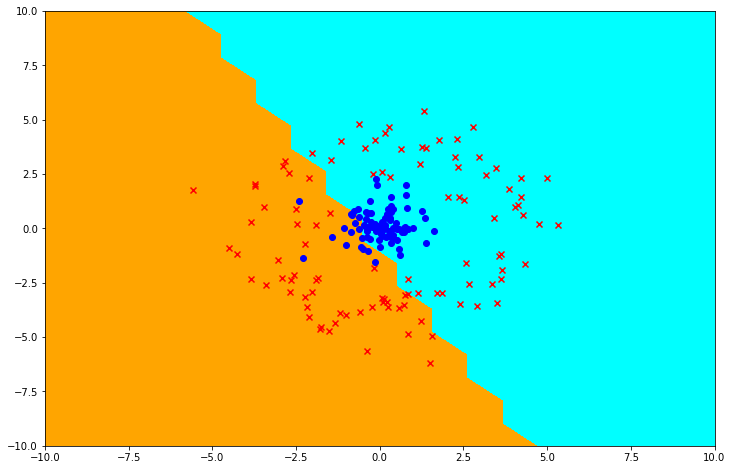

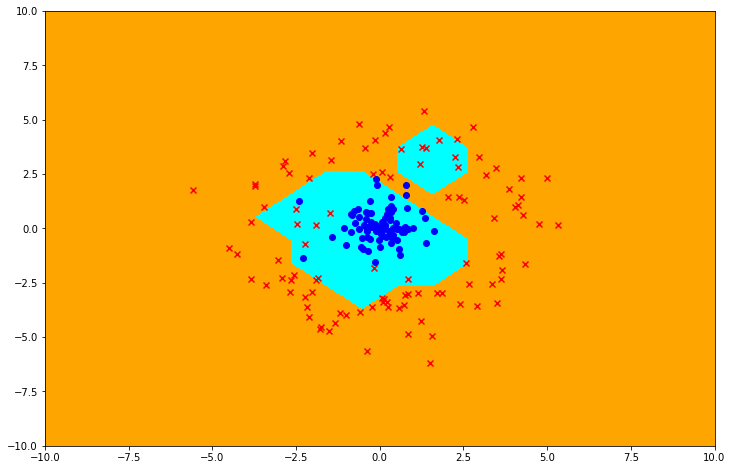

Dot product kernel perform badly because the dataset is not linearly seperable.


In [2]:
train_perceptron('dot', dot_kernel, 0.5)
train_perceptron('rbf', rbf_kernel, 0.5)

print("Dot product kernel perform badly because the dataset is not linearly seperable.")

### 6. Spam classification

In [3]:
import collections

import numpy as np

import util
import svm


def get_words(message):
    """Get the normalized list of words from a message string.

    This function should split a message into words, normalize them, and return
    the resulting list. For splitting, you should split on spaces. For normalization,
    you should convert everything to lowercase.

    Args:
        message: A string containing an SMS message

    Returns:
       The list of normalized words from the message.
    """

    # *** START CODE HERE ***
    message = message.lower()
    words = message.split(" ")
    
    return words
    # *** END CODE HERE ***

def create_dictionary(messages):
    """Create a dictionary mapping words to integer indices.

    This function should create a dictionary of word to indices using the provided
    training messages. Use get_words to process each message. 

    Rare words are often not useful for modeling. Please only add words to the dictionary
    if they occur in at least five messages.

    Args:
        messages: A list of strings containing SMS messages

    Returns:
        A python dict mapping words to integers.
    """

    # *** START CODE HERE ***
    vocabulary = []
    important_vocabulary = []
    
    # Get list of vocabulary
    for message in messages: 
        words = get_words(message)
        for word in words: 
            if word not in vocabulary: 
                vocabulary.append(word)
                
    # Count occurence of each vocab in all messages.          
    count = [0]*len(vocabulary)
    for i in range(len(vocabulary)): 
        for message in messages: 
            words = get_words(message)
            if vocabulary[i] in words: 
                count[i] += 1
                
    # Remove vocabulary with less than 5 occurence
    for i in range(len(count)): 
        if count[i] >= 5:
            important_vocabulary.append(vocabulary[i])
    
    # Build the dictionary
    dict = {}
    for i in range(len(important_vocabulary)): 
        dict[vocabulary[i]] = i
    
    return dict
    
    # *** END CODE HERE ***


def transform_text(messages, word_dictionary):
    """Transform a list of text messages into a numpy array for further processing.

    This function should create a numpy array that contains the number of times each word
    appears in each message. Each row in the resulting array should correspond to each 
    message and each column should correspond to a word.

    Use the provided word dictionary to map words to column indices. Ignore words that 
    are not present in the dictionary. Use get_words to get the words for a message.

    Args:
        messages: A list of strings where each string is an SMS message.
        word_dictionary: A python dict mapping words to integers.

    Returns:
        A numpy array marking the words present in each message.
    """
    # *** START CODE HERE ***
    
    train_matrix = []
    lst = list(word_dictionary)
    for message in messages: 
        array = [0]*len(lst)
        words = get_words(message)
        for word in words: 
            if word in lst: 
                array[lst.index(word)] += 1
        train_matrix.append(array)
    train_matrix = np.array(train_matrix)
    
    return train_matrix
    # *** END CODE HERE ***


def fit_naive_bayes_model(matrix, labels):
    """Fit a naive bayes model.

    This function should fit a Naive Bayes model given a training matrix and labels.

    The function should return the state of that model.

    Feel free to use whatever datatype you wish for the state of the model.

    Args:
        matrix: A numpy array containing word counts for the training data
        labels: The binary (0 or 1) labels for that training data

    Returns: The trained model
    """

    # *** START CODE HERE ***
    m,n = matrix.shape
    
    phi_y = matrix[labels == 1].shape[0] / m 
    phi_y_0 = []
    phi_y_1 = []
    
    for i in range(n): 
        phi_y_0.append((matrix[labels == 0][:,i].sum() + 1) / (matrix[labels == 0].sum() + n))
        phi_y_1.append((matrix[labels == 1][:,i].sum() + 1) / (matrix[labels == 1].sum() + n))
    
    phi_y_0 = np.array(phi_y_0)
    phi_y_1 = np.array(phi_y_1)
    
    return phi_y, phi_y_0, phi_y_1
    # *** END CODE HERE ***


def predict_from_naive_bayes_model(model, matrix):
    """Use a Naive Bayes model to compute predictions for a target matrix.

    This function should be able to predict on the models that fit_naive_bayes_model
    outputs.

    Args:
        model: A trained model from fit_naive_bayes_model
        matrix: A numpy array containing word counts

    Returns: A numpy array containg the predictions from the model
    """
    # *** START CODE HERE ***
    return np.dot(matrix,np.log(model[2] * model[0])) - np.dot(matrix, np.log(model[1] * (1-model[0]))) >= 0.1
    # *** END CODE HERE ***


def get_top_five_naive_bayes_words(model, dictionary):
    """Compute the top five words that are most indicative of the spam (i.e positive) class.

    Ues the metric given in 6c as a measure of how indicative a word is.
    Return the words in sorted form, with the most indicative word first.

    Args:
        model: The Naive Bayes model returned from fit_naive_bayes_model
        dictionary: A mapping of word to integer ids

    Returns: The top five most indicative words in sorted order with the most indicative first
    """
    # *** START CODE HERE ***
    token = np.log(model[2]) - np.log(model[1])
    lst = list(dictionary)
    ranked_indices = np.argsort(-token)
    top5_ranked_indices = ranked_indices[0:5]
    
    top5_ranked_words = []
    for index in top5_ranked_indices: 
        top5_ranked_words.append(lst[index])
    
    return top5_ranked_words
    # *** END CODE HERE ***


def compute_best_svm_radius(train_matrix, train_labels, val_matrix, val_labels, radius_to_consider):
    """Compute the optimal SVM radius using the provided training and evaluation datasets.

    You should only consider radius values within the radius_to_consider list.
    You should use accuracy as a metric for comparing the different radius values.

    Args:
        train_matrix: The word counts for the training data
        train_labels: The spma or not spam labels for the training data
        val_matrix: The word counts for the validation data
        val_labels: The spam or not spam labels for the validation data
        radius_to_consider: The radius values to consider
    
    Returns:
        The best radius which maximizes SVM accuracy.
    """
    # *** START CODE HERE ***
    accuracy_with_radius = []
    for radius in radius_to_consider: 
        accuracy = np.mean(svm.train_and_predict_svm(train_matrix, train_labels, val_matrix, radius) == val_labels)
        accuracy_with_radius.append(accuracy)
    
    return radius_to_consider[accuracy_with_radius.index(max(accuracy_with_radius))]
    # *** END CODE HERE ***

(a) 

In [4]:
train_messages, train_labels = util.load_spam_dataset('data/ds6_train.tsv')
val_messages, val_labels = util.load_spam_dataset('data/ds6_val.tsv')
test_messages, test_labels = util.load_spam_dataset('data/ds6_test.tsv')

dictionary = create_dictionary(train_messages)
util.write_json('output/p06_dictionary', dictionary)

train_matrix = transform_text(train_messages, dictionary)
np.savetxt('output/p06_sample_train_matrix', train_matrix[:100,:])

val_matrix = transform_text(val_messages, dictionary)
test_matrix = transform_text(test_messages, dictionary)

(b) 

\begin{align*} 
\log\frac{P(y=1|x)}{P(y=0|x)}
&= \log\frac{\prod_iP(x_i|y=1)P(y=1)}{\prod_iP(x_i|y=0)P(y=0)} \\ 
&= \sum_i\log P(x_i|y=1)P(y=1) - \sum_i\log P(x_i|y=0)P(y=0)
\end{align*} 

We use this for prediction. If it is larger than 0, then we favor label 1. Otherwise, label 0 is preferred. 

In [5]:
naive_bayes_model = fit_naive_bayes_model(train_matrix, train_labels)

naive_bayes_predictions = predict_from_naive_bayes_model(naive_bayes_model, test_matrix)

np.savetxt('output/p06_naive_bayes_predictions', naive_bayes_predictions)

naive_bayes_accuracy = np.mean(naive_bayes_predictions == test_labels)

print('Naive Bayes had an accuracy of {} on the testing set'.format(naive_bayes_accuracy))


Naive Bayes had an accuracy of 0.9014336917562724 on the testing set


(c)

In [6]:
top_5_words = get_top_five_naive_bayes_words(naive_bayes_model, dictionary)

print('The top 5 indicative words for Naive Bayes are: ', top_5_words)

util.write_json('output/p06_top_indicative_words', top_5_words)

The top 5 indicative words for Naive Bayes are:  ['claim', 'won', 'tone', 'urgent!', 'awarded']


(d)

In [7]:
optimal_radius = compute_best_svm_radius(train_matrix, train_labels, val_matrix, val_labels, [0.01, 0.1, 1, 10])

util.write_json('output/p06_optimal_radius', optimal_radius)

print('The optimal SVM radius was {}'.format(optimal_radius))

svm_predictions = svm.train_and_predict_svm(train_matrix, train_labels, test_matrix, optimal_radius)

svm_accuracy = np.mean(svm_predictions == test_labels)

print('The SVM model had an accuracy of {} on the testing set'.format(svm_accuracy, optimal_radius))

The optimal SVM radius was 0.1
The SVM model had an accuracy of 0.9695340501792115 on the testing set
